In [55]:
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

In [56]:
df = pd.read_csv("Q1_data.csv")
df.head()

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10


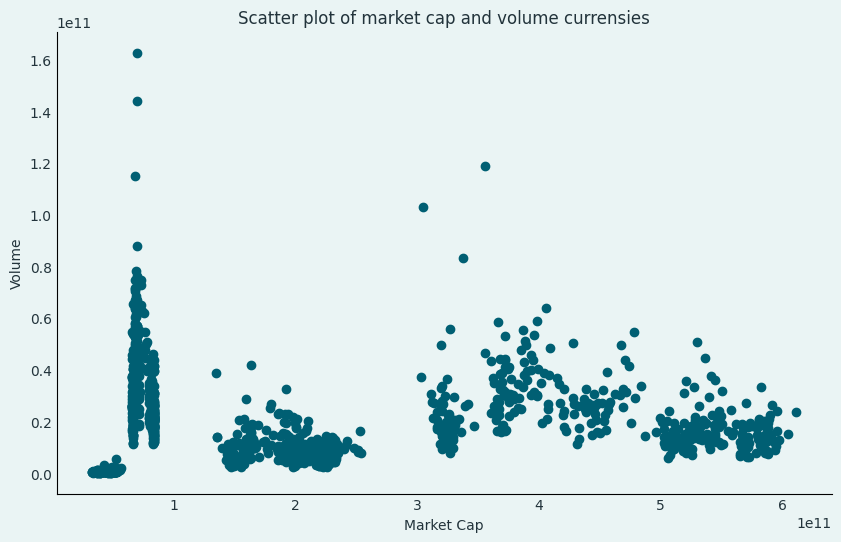

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df["market_cap"], df["volume"], marker="o", color="#005f73")
ax.set_title(
    "Scatter plot of market cap and volume currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

,0,1
count,1456.000000,1456.000000
mean,0.278317,0.099397
std,0.294982,0.104590
min,0.000000,0.000000
25%,0.053115,0.013484
50%,0.132676,0.072501
75%,0.403669,0.149146
max,1.000000,1.000000


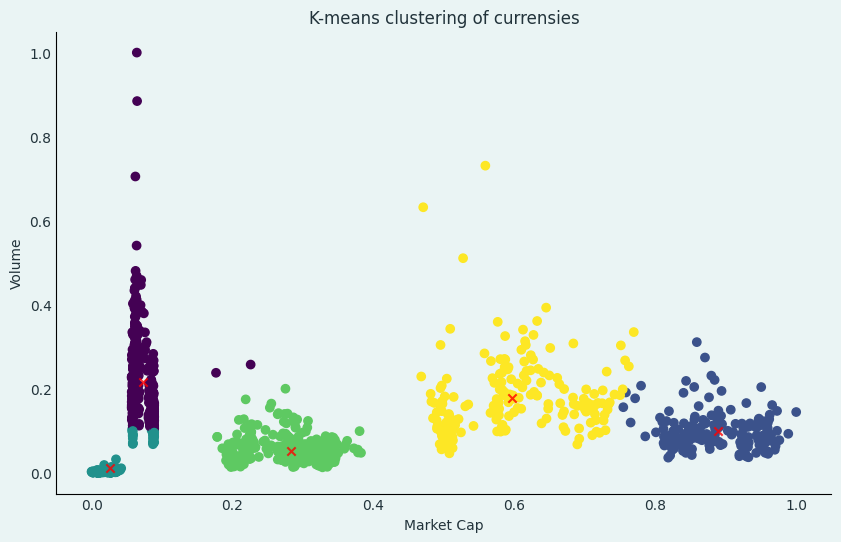

In [58]:
data = df[["market_cap", "volume"]]
scaler = MinMaxScaler()
# scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data))
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
centers = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data[0], data[1], c=kmeans.labels_, marker="o", cmap="viridis")
ax.scatter(centers[:, 0], centers[:, 1], c="red", marker="x", alpha=0.8)
ax.set_title("K-means clustering of currensies", fontsize=12, color="#22333b")
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
data.describe()

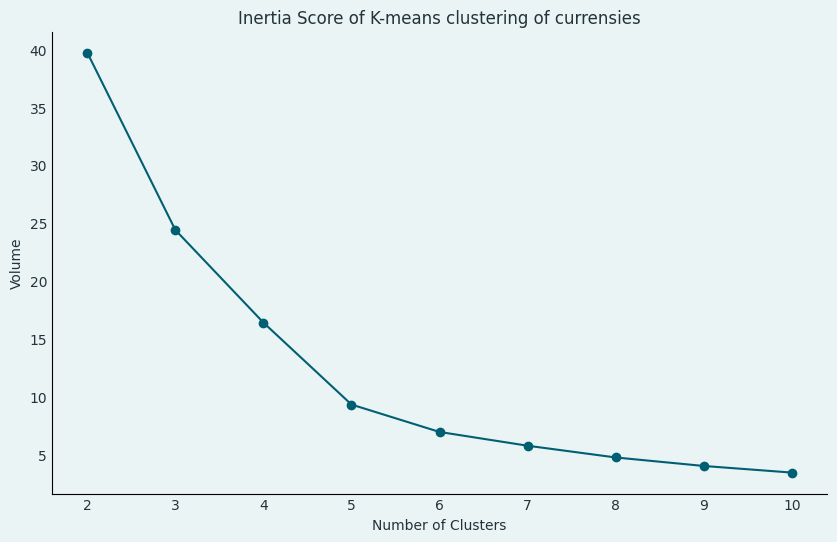

In [59]:
iner = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    iner.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 11), iner, marker="o", color="#005f73")
ax.set_title(
    "Inertia Score of K-means clustering of currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Number of Clusters", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)